In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [2]:
mod_00164 = pd.read_csv("data/MOD-00164.csv")
mod_00166 = pd.read_csv("data/MOD-00166.csv")
mod_00170 = pd.read_csv("data/MOD-00170.csv")
mod_00174 = pd.read_csv("data/MOD-00174.csv")
mod_00181 = pd.read_csv("data/MOD-00181.csv")
mod_00182 = pd.read_csv("data/MOD-00182.csv")
mod_00337 = pd.read_csv("data/MOD-00337.csv")
mod_00343 = pd.read_csv("data/MOD-00343.csv")

In [5]:
#combine into singular dataframes for no2 and o3
dfs = {
    "MOD-00164": mod_00164,
    "MOD-00166": mod_00166,
    "MOD-00170": mod_00170,
    "MOD-00174": mod_00174,
    "MOD-00181": mod_00181,
    "MOD-00182": mod_00182,
    "MOD-00337": mod_00337,
    "MOD-00343": mod_00343,
}

for k, df in dfs.items():
    df["period_start_utc"] = pd.to_datetime(df["period_start_utc"])
    dfs[k] = df.set_index("period_start_utc")

no2_df = pd.concat(
    {sensor: df["no2"] for sensor, df in dfs.items()},
    axis=1
)

no2_df.head()
no2_df.to_csv("data/delmelater.csv")

In [6]:
o3_df = pd.concat(
    {sensor: df["o3"] for sensor, df in dfs.items()},
    axis=1
)

o3_df.head()
o3_df.to_csv("data/delmelater2.csv")

In [7]:
no2_df["MOD-00170"].describe()

count    292.000000
mean      21.308836
std       10.802121
min        3.632000
25%       11.816750
50%       21.058500
75%       30.754000
max       44.489000
Name: MOD-00170, dtype: float64

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/3787528895.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


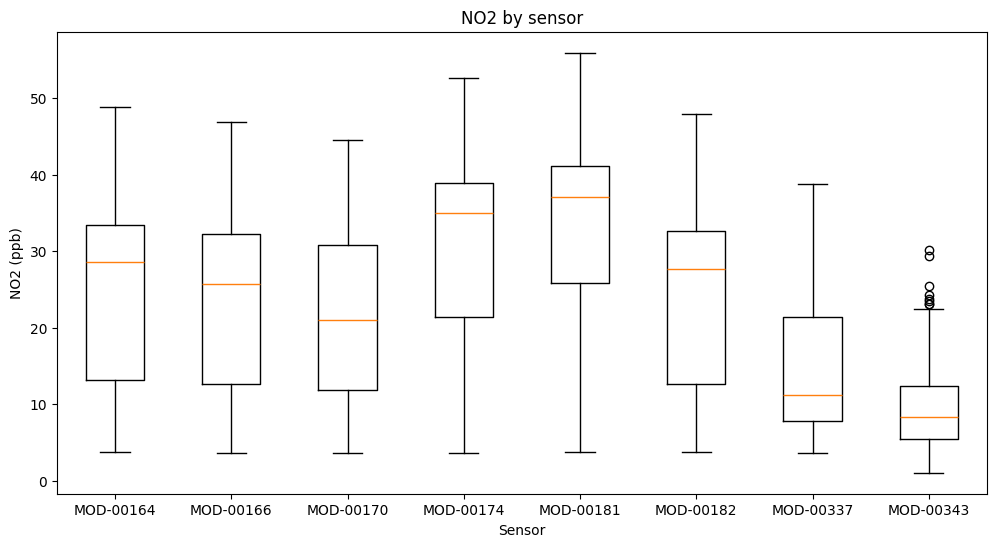

In [9]:
no2_clean = no2_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [no2_clean[col].dropna() for col in no2_clean.columns],
    labels=no2_clean.columns,
    showfliers=True
)

plt.ylabel("NO2 (ppb)")
plt.xlabel("Sensor")
plt.title("NO2 by sensor")
plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/2569359695.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


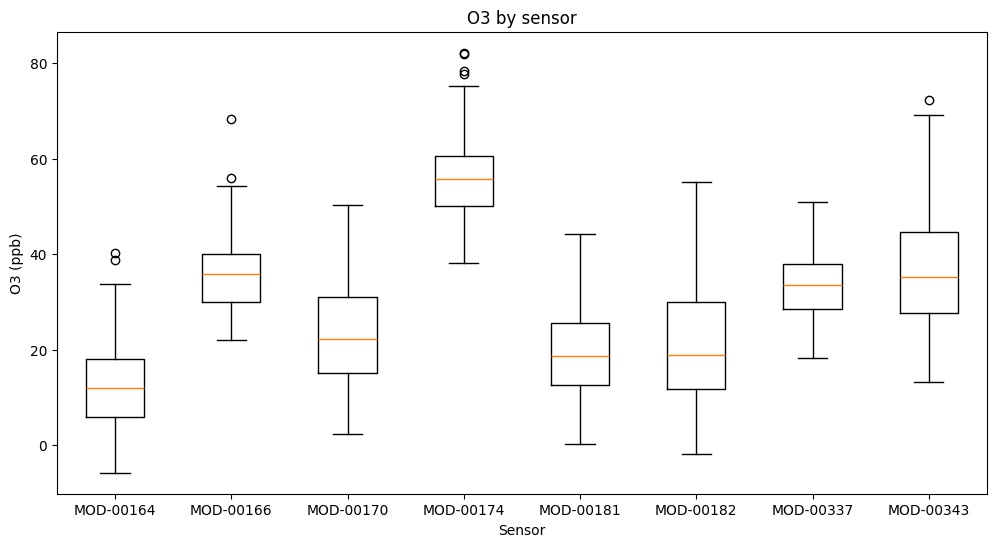

In [10]:
o3_clean = o3_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [o3_clean[col].dropna() for col in o3_clean.columns],
    labels=o3_clean.columns,
    showfliers=True
)

plt.ylabel("O3 (ppb)")
plt.xlabel("Sensor")
plt.title("O3 by sensor")
plt.show()


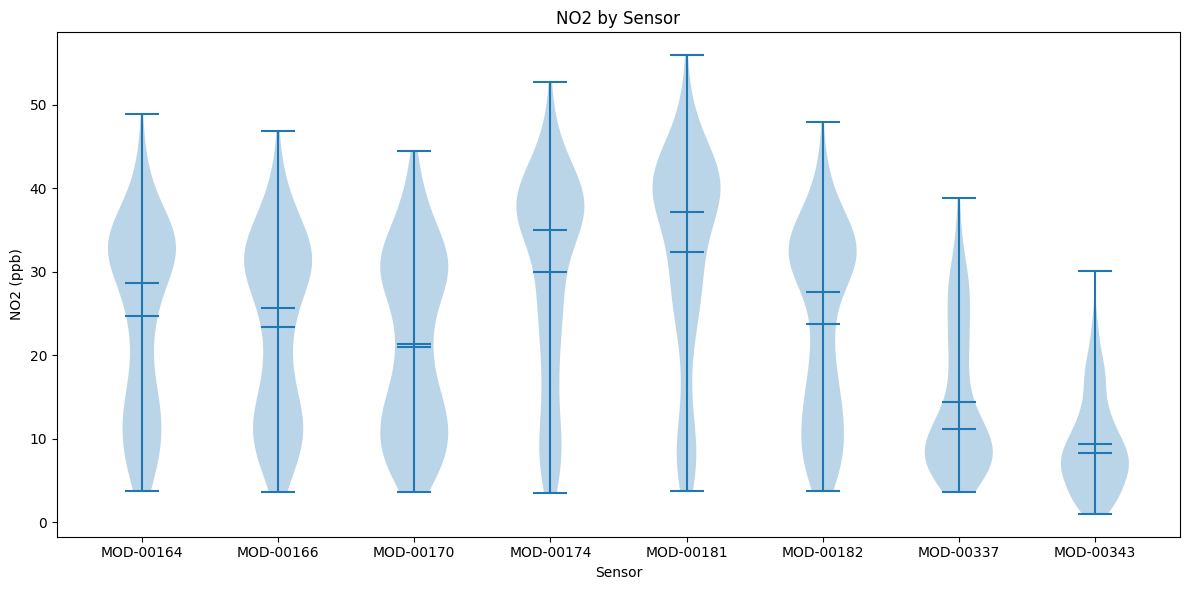

In [11]:
plt.figure(figsize=(12, 6))
plt.violinplot(
    [no2_clean[col].dropna() for col in no2_clean.columns],
    showmeans=True,
    showmedians=True
)

plt.xticks(
    range(1, len(no2_clean.columns) + 1),
    no2_clean.columns,
)

plt.ylabel("NO2 (ppb)")
plt.xlabel("Sensor")
plt.title("NO2 by Sensor")
plt.tight_layout()
plt.show()


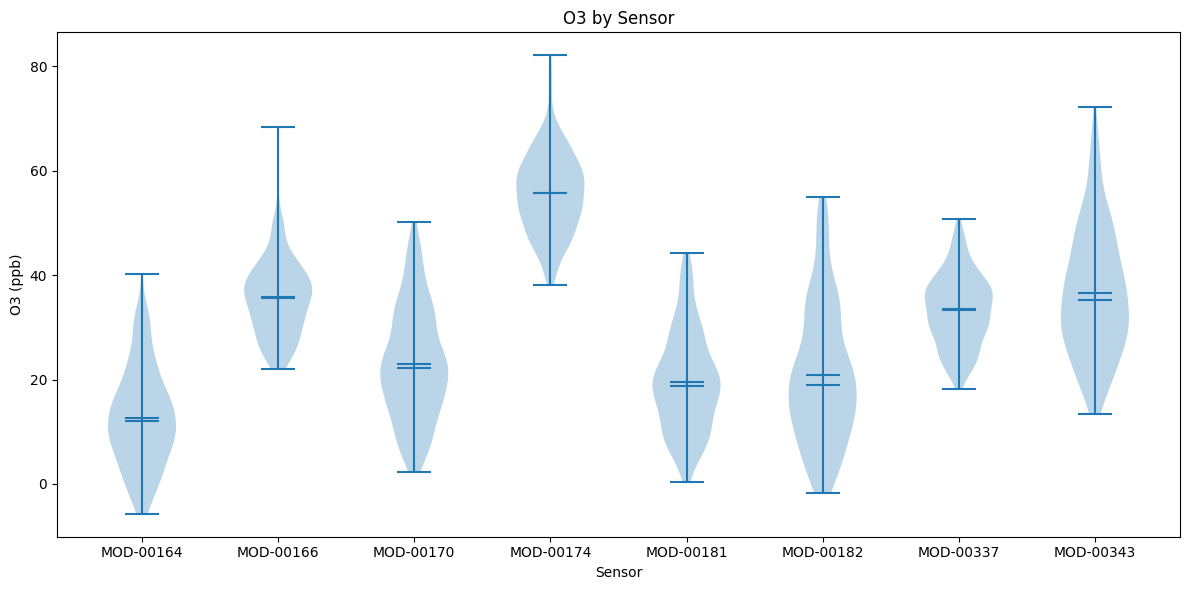

In [12]:
plt.figure(figsize=(12, 6))
plt.violinplot(
    [o3_clean[col].dropna() for col in o3_clean.columns],
    showmeans=True,
    showmedians=True
)

plt.xticks(
    range(1, len(o3_clean.columns) + 1),
    o3_clean.columns,
)

plt.ylabel("O3 (ppb)")
plt.xlabel("Sensor")
plt.title("O3 by Sensor")
plt.tight_layout()
plt.show()

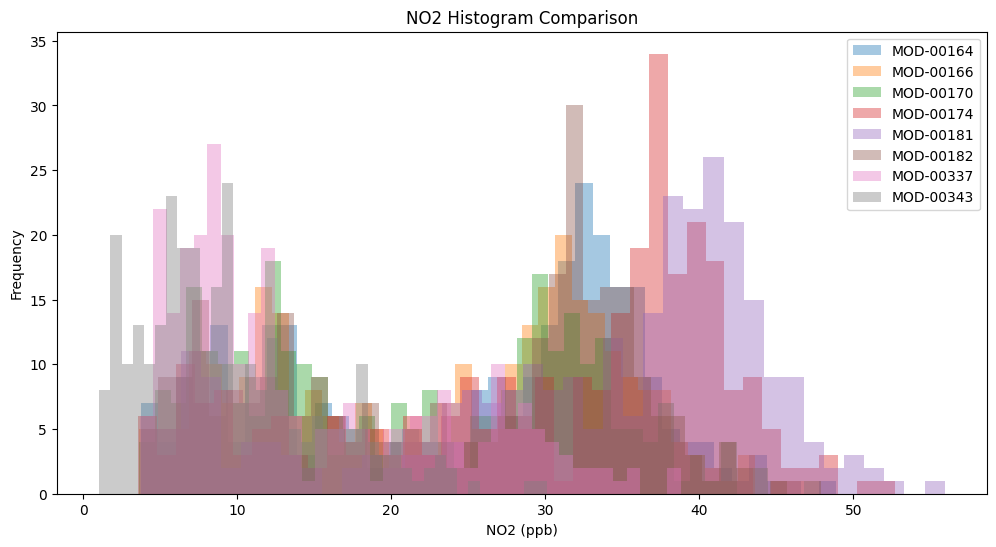

In [13]:
plt.figure(figsize=(12, 6))

for col in no2_clean.columns:
    plt.hist(
        no2_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("NO2 (ppb)")
plt.ylabel("Frequency")
plt.title("NO2 Histogram Comparison")
plt.legend()
plt.show()


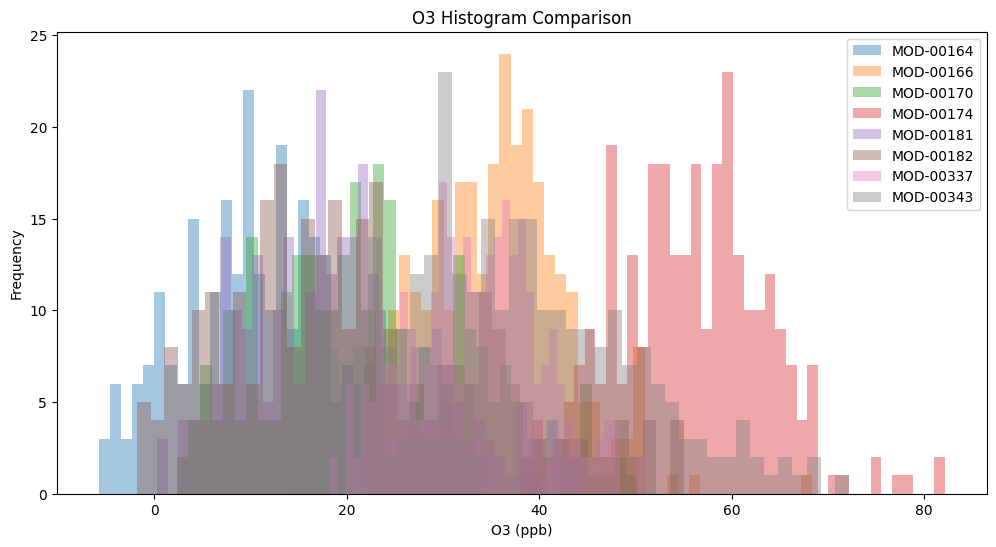

In [14]:
plt.figure(figsize=(12, 6))

for col in o3_clean.columns:
    plt.hist(
        o3_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("O3 (ppb)")
plt.ylabel("Frequency")
plt.title("O3 Histogram Comparison")
plt.legend()
plt.show()


In [27]:
#function for calculating RSD

def compute_rsd(df, sensors=None):
    if sensors is not None:
        df = df[sensors]

    mean = df.mean(axis=1, skipna=True)
    std = df.std(axis=1, skipna=True)

    rsd = (std / mean) * 100

    return rsd

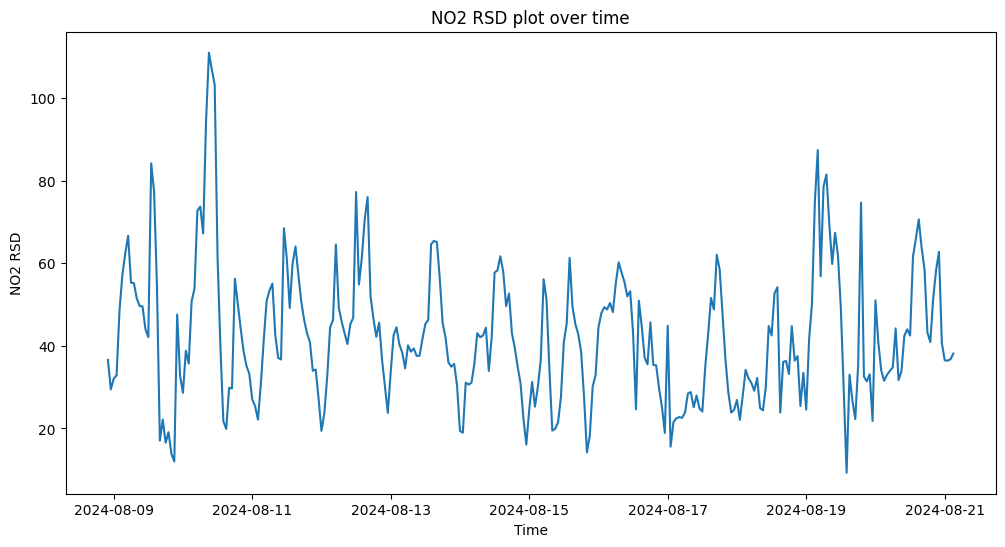

In [28]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_no2 = compute_rsd(
    no2_df,
    sensors=selected_sensors,
)

rsd_no2_clean = rsd_no2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_no2_clean.index, rsd_no2_clean.values)
plt.ylabel("NO2 RSD")
plt.xlabel("Time")
plt.title("NO2 RSD plot over time")
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/3300706896.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


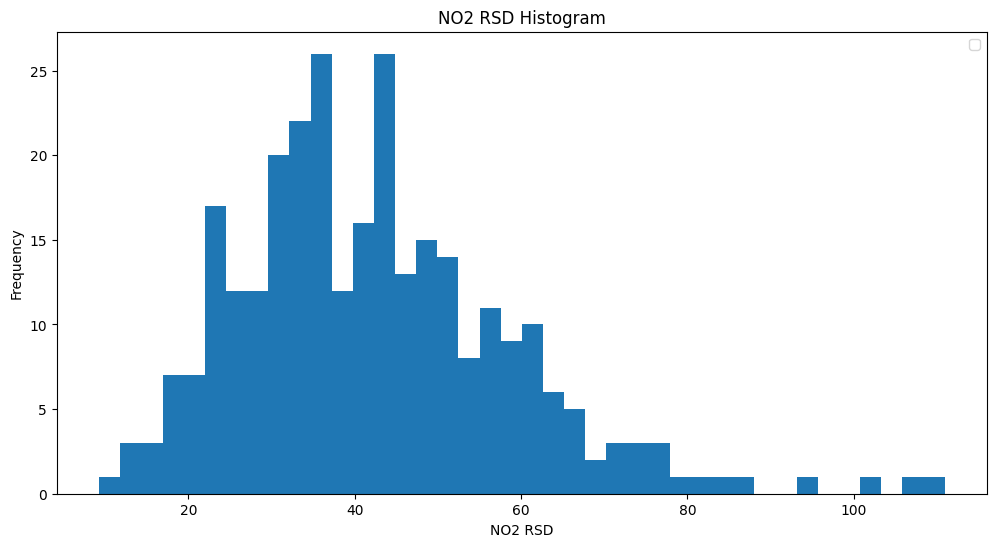

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/3300706896.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


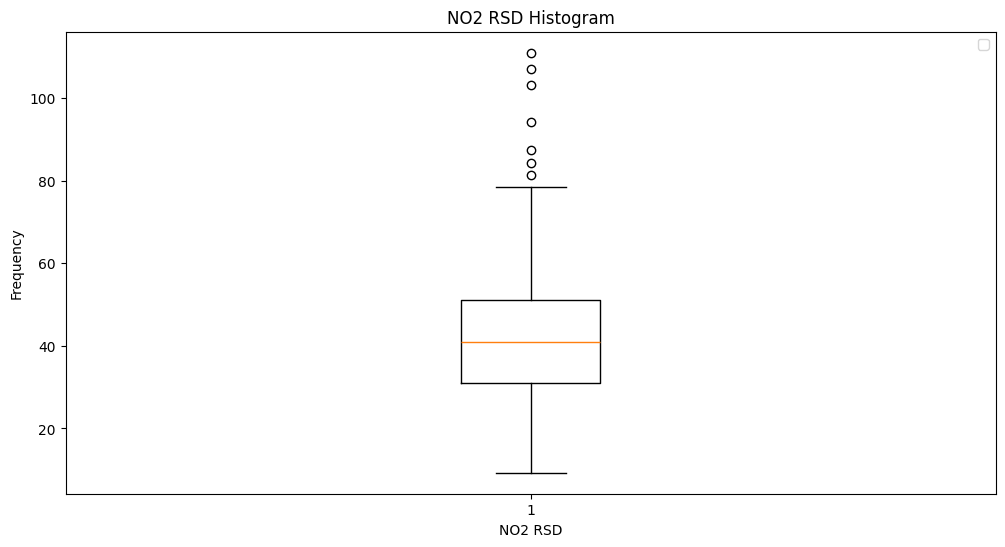

In [29]:
plt.figure(figsize=(12, 6))
plt.hist(rsd_no2_clean, bins=40)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(rsd_no2_clean)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram")
plt.legend()
plt.show()

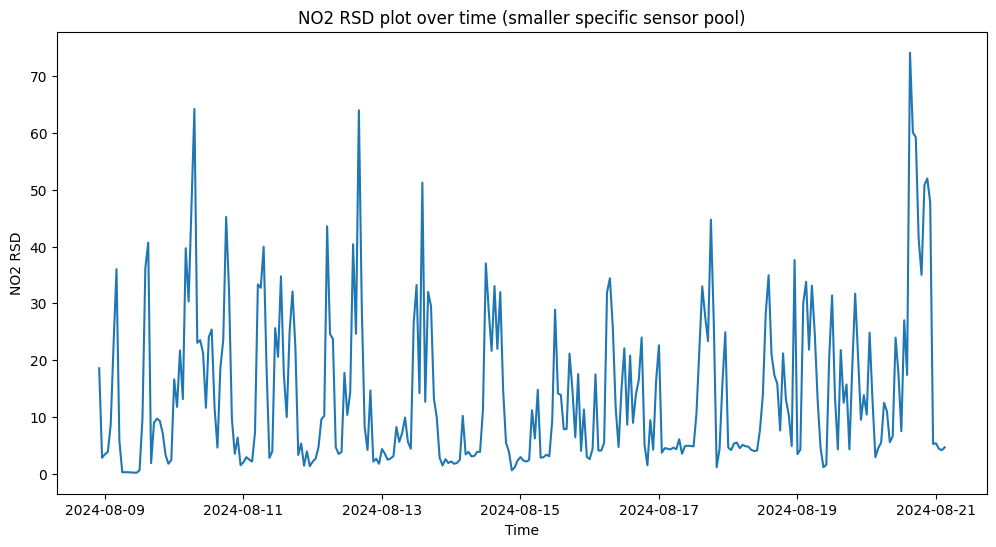

In [30]:
new_selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00182"
]

new_rsd_no2 = compute_rsd(
    no2_df,
    sensors=new_selected_sensors,
)

new_rsd_no2_clean = new_rsd_no2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(new_rsd_no2_clean.index, new_rsd_no2_clean.values)
plt.ylabel("NO2 RSD")
plt.xlabel("Time")
plt.title("NO2 RSD plot over time (smaller specific sensor pool)")
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/4126251278.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


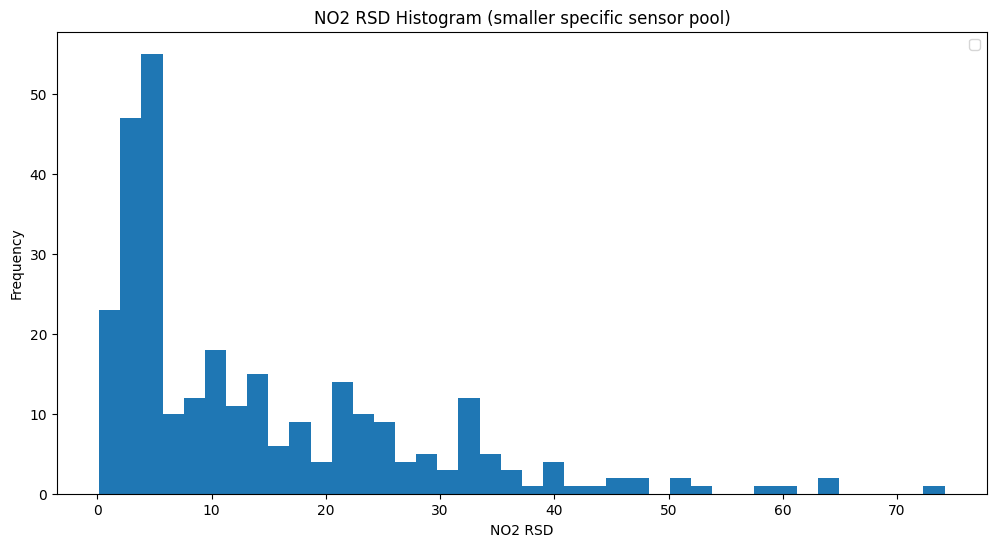

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/4126251278.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


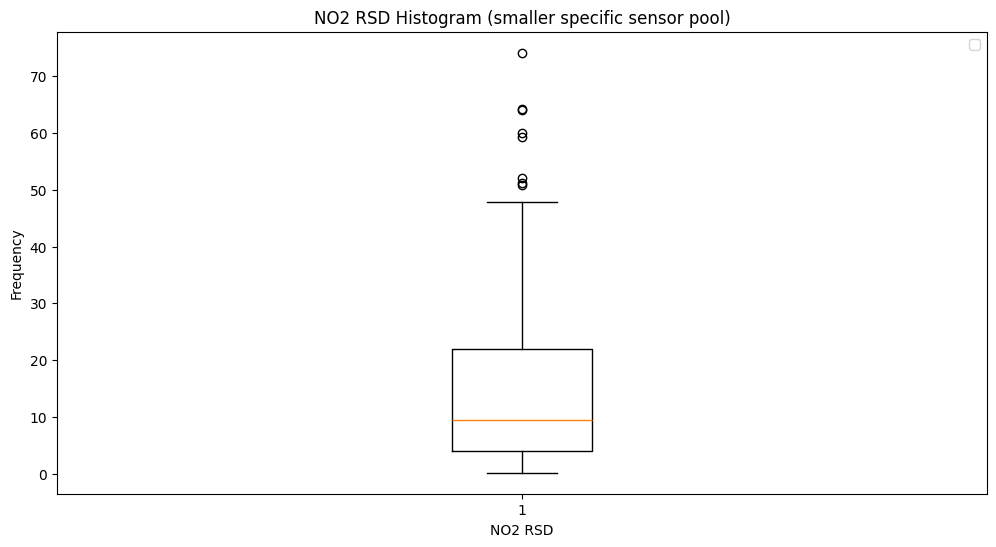

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(new_rsd_no2_clean, bins=40)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (smaller specific sensor pool)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(new_rsd_no2_clean)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (smaller specific sensor pool)")
plt.legend()
plt.show()

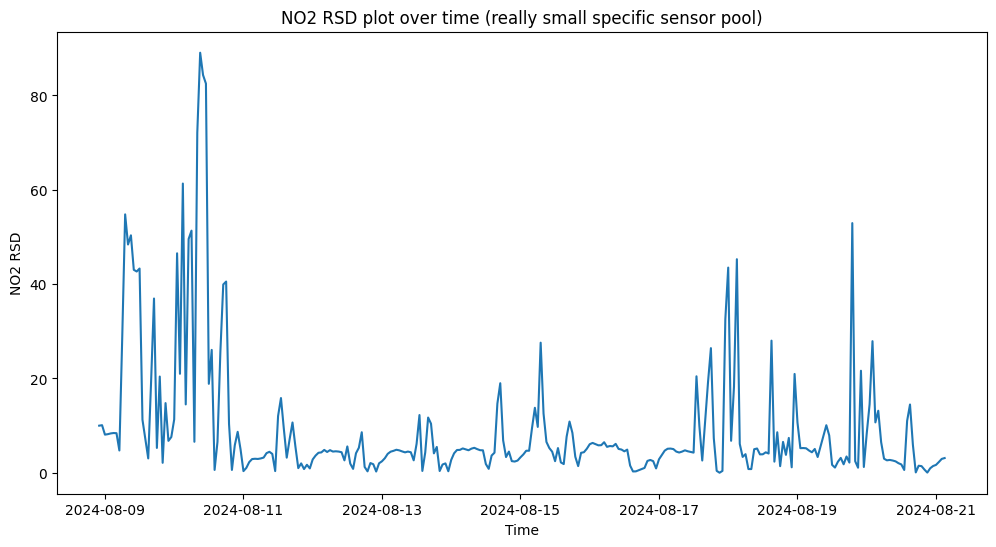

In [32]:
small_selected_sensors = [
    "MOD-00174",
    "MOD-00181",
]

smallpool_rsd_no2 = compute_rsd(
    no2_df,
    sensors=small_selected_sensors,
)

smallpool_rsd_no2_clean = smallpool_rsd_no2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(smallpool_rsd_no2_clean.index, smallpool_rsd_no2_clean.values)
plt.ylabel("NO2 RSD")
plt.xlabel("Time")
plt.title("NO2 RSD plot over time (really small specific sensor pool)")
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/1449122964.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


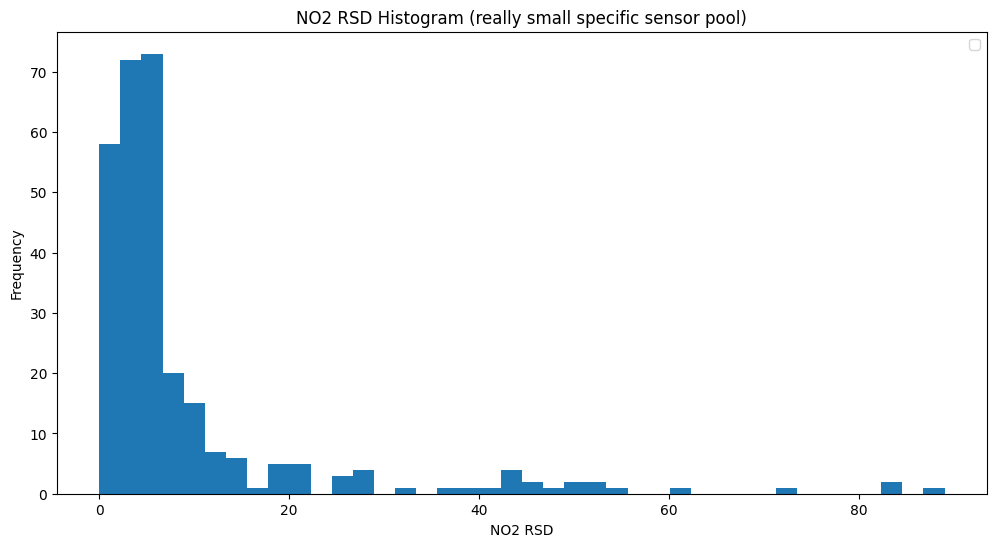

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_75233/1449122964.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


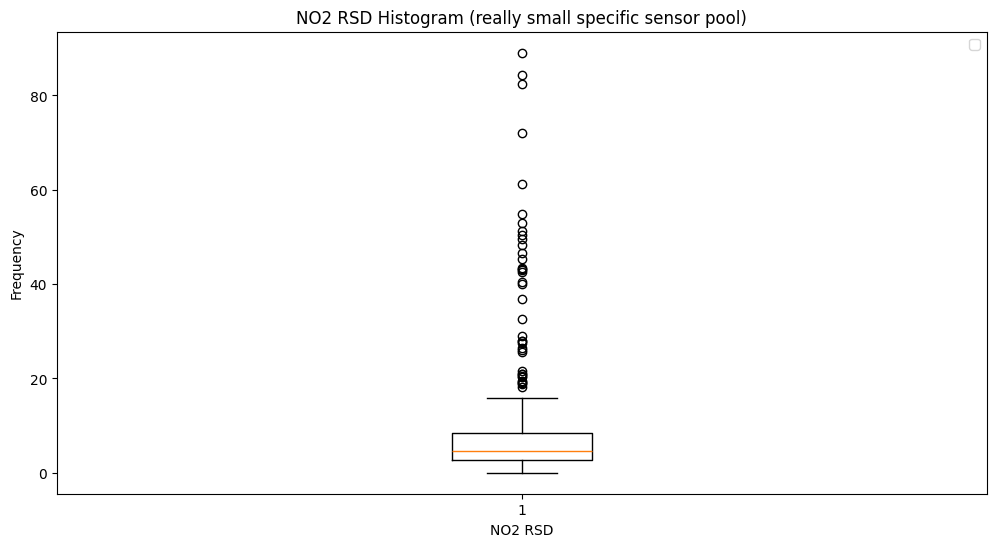

In [33]:
plt.figure(figsize=(12, 6))
plt.hist(smallpool_rsd_no2_clean, bins=40)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (really small specific sensor pool)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(smallpool_rsd_no2_clean)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (really small specific sensor pool)")
plt.legend()
plt.show()

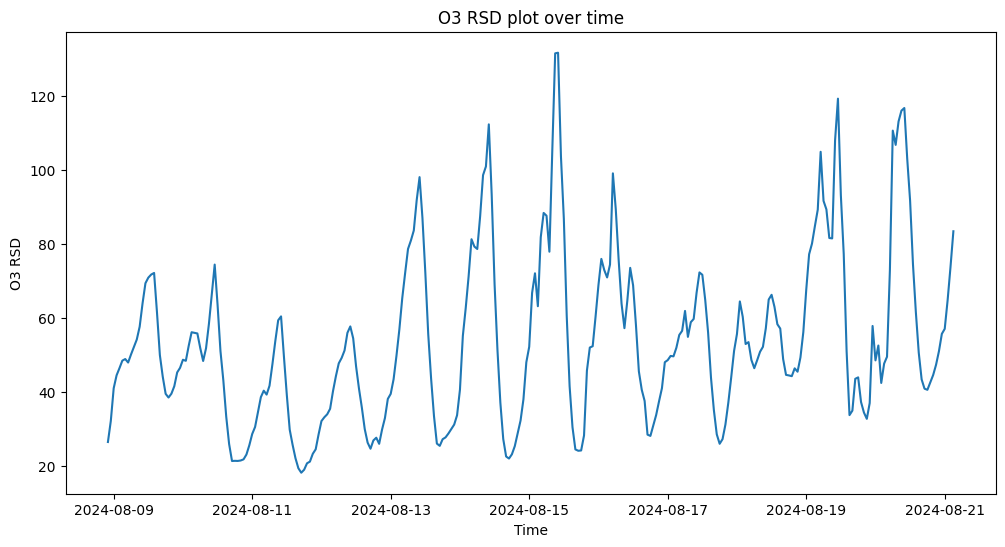

In [34]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_o3 = compute_rsd(
    o3_df,
    sensors=selected_sensors,
)

rsd_o3_clean = rsd_o3.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_o3_clean.index, rsd_o3_clean.values)
plt.ylabel("O3 RSD")
plt.xlabel("Time")
plt.title("O3 RSD plot over time")
plt.show()

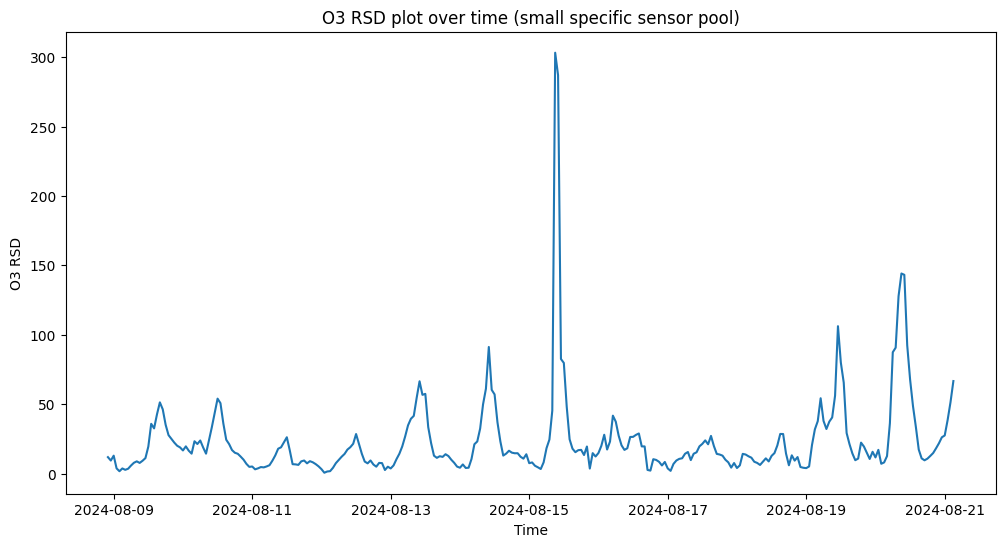

In [35]:
small_selected_sensors = [
    "MOD-00170",
    "MOD-00181",
    "MOD-00182",
]

small_rsd_o3 = compute_rsd(
    o3_df,
    sensors=small_selected_sensors,
)

small_rsd_o3_clean = small_rsd_o3.dropna()

plt.figure(figsize=(12, 6))
plt.plot(small_rsd_o3_clean.index, small_rsd_o3_clean.values)
plt.ylabel("O3 RSD")
plt.xlabel("Time")
plt.title("O3 RSD plot over time (small specific sensor pool)")
plt.show()